# 0000 - Yolo5 Experiment
---
**07.11.2020**

In [1]:
import sys 
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append("../")

In [3]:
from src.pipeline.infer import InferenceEngine

In [4]:
engine = InferenceEngine()


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     19904  models.common.BottleneckCSP             [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    161152  models.common.BottleneckCSP             [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1    656896  

Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients


Fusing layers... 
Adding autoShape... 


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).fuse().eval()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     19904  models.common.BottleneckCSP             [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    161152  models.common.BottleneckCSP             [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                   

Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients


Fusing layers... 


In [3]:
model = model.autoshape()

Adding autoShape... 


In [5]:
# Images
img1 = Image.open('../data/images/video_01_0001.png')
img2 = Image.open('../data/images/video_01_0002.png')
img3 = Image.open('../data/images/video_01_0003.png')
img4 = Image.open('../data/images/video_01_0004.png')
img5 = Image.open('../data/images/video_01_0005.png')
img6 = Image.open('../data/images/video_01_0006.png')

imgs = [img1, img2, img3, img4, img5, img6]

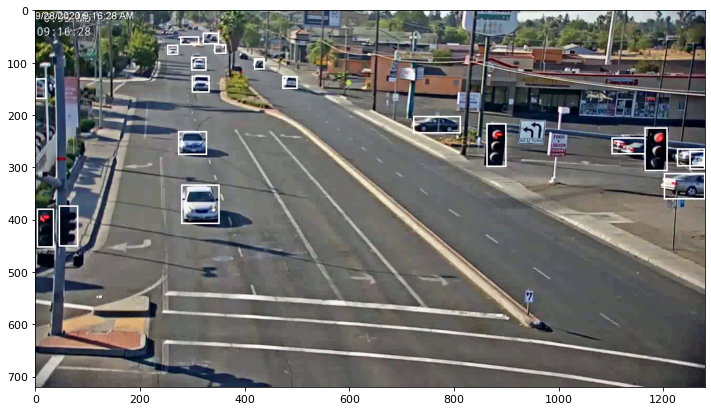

Image 1/6: 720x1280 16 cars, 4 traffic lights, Done.


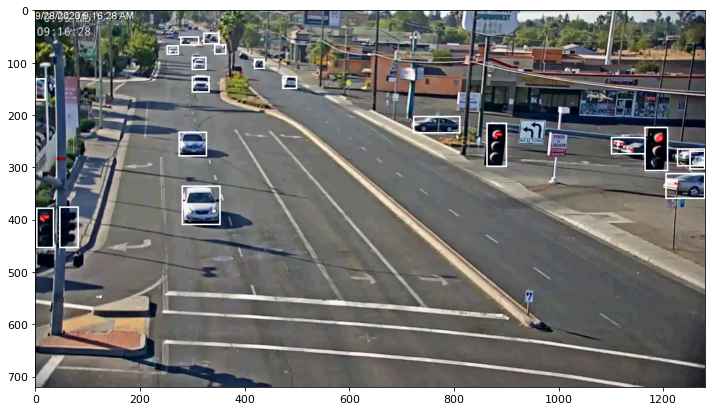

Image 2/6: 720x1280 16 cars, 4 traffic lights, Done.


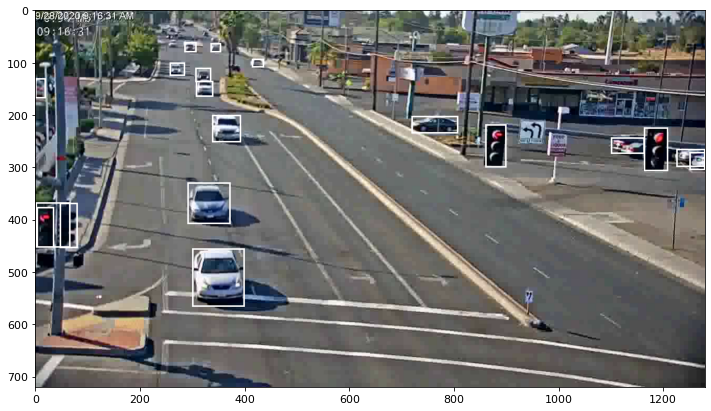

Image 3/6: 720x1280 14 cars, 5 traffic lights, Done.


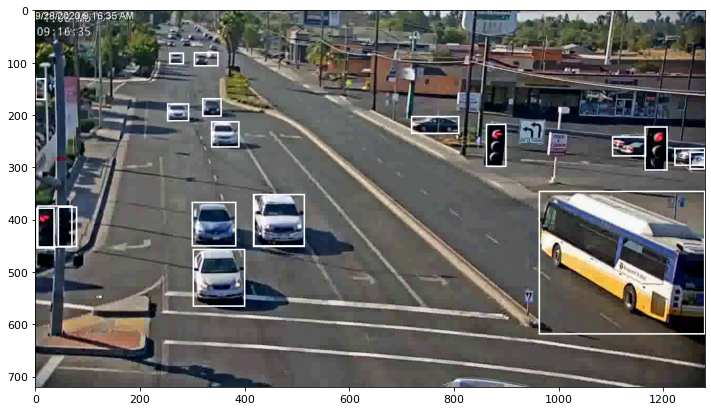

Image 4/6: 720x1280 13 cars, 1 buss, 1 trucks, 5 traffic lights, Done.


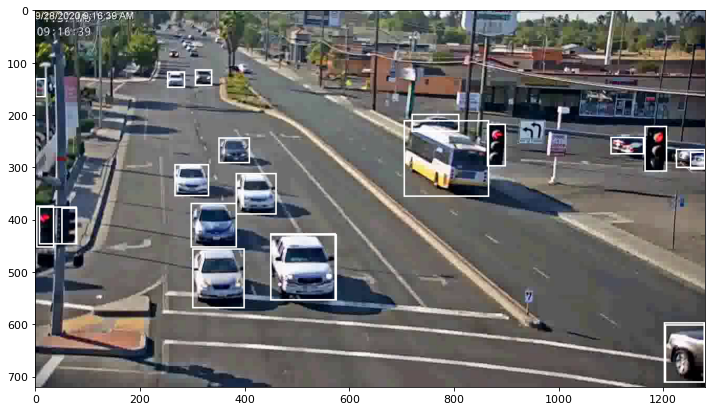

Image 5/6: 720x1280 14 cars, 1 buss, 2 trucks, 5 traffic lights, Done.


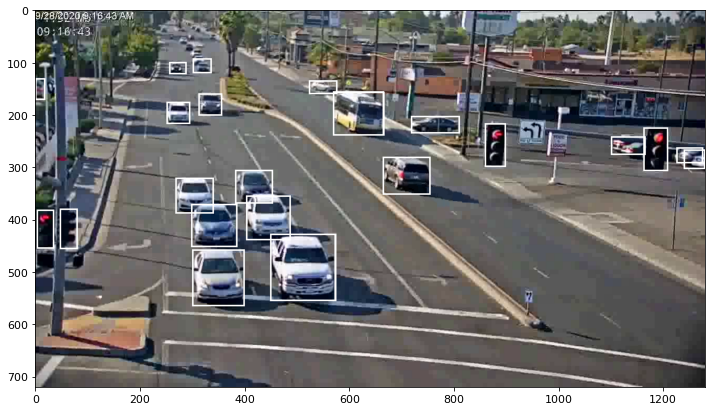

Image 6/6: 720x1280 18 cars, 2 trucks, 4 traffic lights, Done.


In [14]:
# Inference
with torch.no_grad():
    prediction = model(imgs)

# Plot
for i, (img, pred) in enumerate(zip(imgs, prediction)):
    str = 'Image %g/%g: %gx%g ' % (i + 1, len(imgs), *img.shape[:2])
    img = Image.fromarray(img.astype(np.uint8)) if isinstance(img, np.ndarray) else img  # from np
    if pred is not None:
        for c in pred[:, -1].unique():
            n = (pred[:, -1] == c).sum()  # detections per class
            str += '%g %ss, ' % (n, model.names[int(c)])  # add to string
        for *box, conf, cls in pred:  # xyxy, confidence, class
            label = model.names[int(cls)] if hasattr(model, 'names') else 'class_%g' % cls
            # str += '%s %.2f, ' % (label, conf)  # label
            ImageDraw.Draw(img).rectangle(box, width=3)  # plot
#     img.save('results%g.jpg' % i)  # save
    plt.figure(figsize = (12, 12))
    plt.imshow(img) 
    plt.show()
    print(str + 'Done.')

In [6]:
engine.infer(img1)

[DetectedObject(name='traffic light', confidence=0.77361614, bounding_box=BoundingBox(x=862.48376, y=216.70221, width=900.99426, height=299.22473)),
 DetectedObject(name='car', confidence=0.76621264, bounding_box=BoundingBox(x=273.28284, y=231.02554, width=328.8744, height=276.69382)),
 DetectedObject(name='car', confidence=0.7424446, bounding_box=BoundingBox(x=722.44495, y=202.20651, width=813.0349, height=235.88782)),
 DetectedObject(name='car', confidence=0.7382883, bounding_box=BoundingBox(x=279.88412, y=333.58536, width=352.9252, height=408.509)),
 DetectedObject(name='traffic light', confidence=0.7296157, bounding_box=BoundingBox(x=3.5165367, y=379.49445, width=36.957615, height=453.49042)),
 DetectedObject(name='traffic light', confidence=0.696923, bounding_box=BoundingBox(x=1164.1869, y=224.01712, width=1208.9696, height=307.85434)),
 DetectedObject(name='car', confidence=0.66560626, bounding_box=BoundingBox(x=299.7111, y=125.58118, width=333.68942, height=157.35074)),
 Detecte